#  Measurement of the zero of waveplate
***
* Eder Martioli, LNA 26 Feb 2025

This notebook presents an analysis of data collected during an engineering night with SPARC4 to measure the zero of the waveplate, based on observations of a circularly polarized standard star.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib
from uncertainties import ufloat

### Access to the reduced data :
The reduced data presented in this document as well as all reduced data from the engineering night with SPARC4 on Feb 24, 2025, are available for download at [Engineering 20250224](https://drive.google.com/drive/folders/1_bVizkJ1jjyxw4BnAAnbtSKVV1jhNZMl?usp=sharing).

# Circularly polarized standard: WD 1036-204
***
In this section we analyze the circularly polarized standard WD 1036-204

### Load file paths :

In [2]:
s2, s4 = [], []
p2, p4 = [], []

# change path below to the location where the reduced data are saved:
reducedir = "/Users/eder/Science/Transits-OPD_2024A/20250224/"

for ch in range(1,5) :
    s2_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L2__stack.fits".format(reducedir,ch)
    s4_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L4__stack.fits".format(reducedir,ch)
    p2_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L2__polar.fits".format(reducedir,ch)
    p4_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L4__polar.fits".format(reducedir,ch)
    s2.append(s2_filepath)
    s4.append(s4_filepath)
    p2.append(p2_filepath)
    p4.append(p4_filepath)

### Plot stack to visually identify target index:

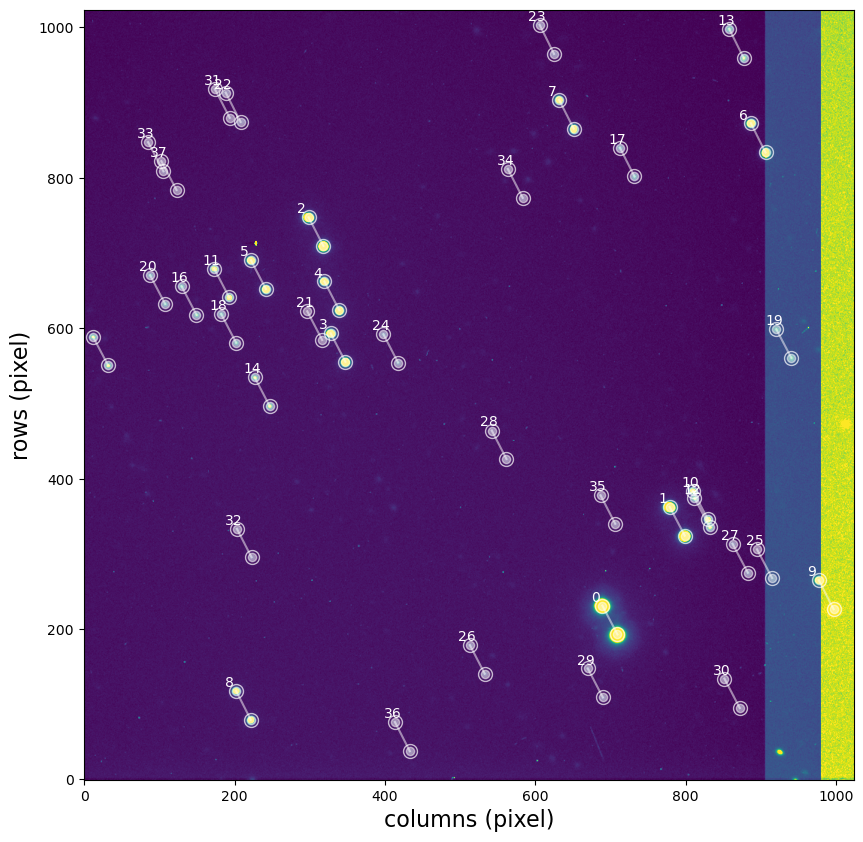

In [22]:
# set channel: 1 (g-band), 2 (r-band), 3 (i-band), or 4 (z-band)
channel = 1

# plot stack to check the stack image of the field and detected sources:
s4plt.plot_sci_polar_frame(s4[channel-1])

### Set index and make a first plot of the polarimetry:

2025-03-06 13:39:26,913 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:39:26,913 | INFO | Normalization disabled.


2025-03-06 13:39:26,962 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-03-06 13:39:26,962 | INFO | Substituting symbol \perp from STIXGeneral


2025-03-06 13:39:26,965 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-03-06 13:39:26,965 | INFO | Substituting symbol \perp from STIXGeneral


2025-03-06 13:39:27,070 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-03-06 13:39:27,070 | INFO | Substituting symbol \perp from STIXGeneral


2025-03-06 13:39:27,073 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-03-06 13:39:27,073 | INFO | Substituting symbol \perp from STIXGeneral


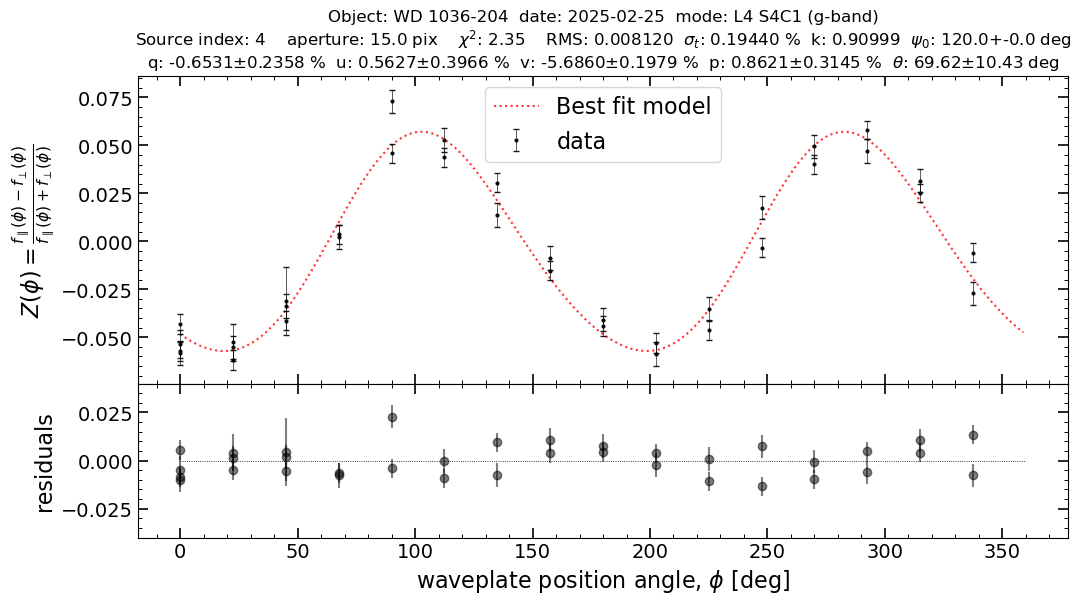

In [23]:
source_index = 4 # set target index
zero_guess = 120 # set zero of waveplate, in degrees

# get polarimetry results for the selected channel, source, and zero value:
pol_results = s4pipelib.get_polarimetry_results(p4[channel-1],
                                                source_index=source_index,
                                                min_aperture=4,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=False,
                                                zero=zero_guess)

### Select sampling of trial zeros, and set variables 

In [18]:
zeros = np.linspace(0, 180, num=200) # set array of trial zeros
mask = zeros < 200 # mask values to avoid double minima when full range is 360 deg
rms = [np.array([]), np.array([]), np.array([]), np.array([])]
imin = [None, None, None, None]
source_index = [4,4,4,4]
colors = ["lightblue","darkgreen","darkorange","red"]
bands = ["g","r","i","z"]

### Calculate polarimetry for all trial zeros in the four channels

In [19]:
# the loop may take a few minutes to run
for ch in range(1,5) :    
    for i in range(len(zeros)) :
        pol_results = s4pipelib.get_polarimetry_results(p4[ch-1],
                                                source_index=source_index[ch-1],
                                                min_aperture=4,
                                                max_aperture=21,
                                                plot=False,
                                                verbose=False,
                                                zero=zeros[i])
        rms[ch-1] = np.append(rms[ch-1],pol_results['RMS'])

2025-03-06 13:31:07,579 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:07,579 | INFO | Normalization disabled.


2025-03-06 13:31:07,795 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:07,795 | INFO | Normalization disabled.


2025-03-06 13:31:07,977 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:07,977 | INFO | Normalization disabled.


2025-03-06 13:31:08,166 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:08,166 | INFO | Normalization disabled.


2025-03-06 13:31:08,387 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:08,387 | INFO | Normalization disabled.


2025-03-06 13:31:08,568 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:08,568 | INFO | Normalization disabled.


2025-03-06 13:31:08,749 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:08,749 | INFO | Normalization disabled.


2025-03-06 13:31:08,971 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:08,971 | INFO | Normalization disabled.


2025-03-06 13:31:09,185 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:09,185 | INFO | Normalization disabled.


2025-03-06 13:31:09,411 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:09,411 | INFO | Normalization disabled.


2025-03-06 13:31:09,597 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:09,597 | INFO | Normalization disabled.


2025-03-06 13:31:09,781 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:09,781 | INFO | Normalization disabled.


2025-03-06 13:31:10,002 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:10,002 | INFO | Normalization disabled.


2025-03-06 13:31:10,184 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:10,184 | INFO | Normalization disabled.


2025-03-06 13:31:10,409 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:10,409 | INFO | Normalization disabled.


2025-03-06 13:31:10,596 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:10,596 | INFO | Normalization disabled.


2025-03-06 13:31:10,781 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:10,781 | INFO | Normalization disabled.


2025-03-06 13:31:11,006 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:11,006 | INFO | Normalization disabled.


2025-03-06 13:31:11,194 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:11,194 | INFO | Normalization disabled.


2025-03-06 13:31:11,383 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:11,383 | INFO | Normalization disabled.


2025-03-06 13:31:11,601 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:11,601 | INFO | Normalization disabled.


2025-03-06 13:31:11,783 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:11,783 | INFO | Normalization disabled.


2025-03-06 13:31:12,003 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:12,003 | INFO | Normalization disabled.


2025-03-06 13:31:12,188 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:12,188 | INFO | Normalization disabled.


2025-03-06 13:31:12,378 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:12,378 | INFO | Normalization disabled.


2025-03-06 13:31:12,602 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:12,602 | INFO | Normalization disabled.


2025-03-06 13:31:12,787 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:12,787 | INFO | Normalization disabled.


2025-03-06 13:31:12,970 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:12,970 | INFO | Normalization disabled.


2025-03-06 13:31:13,186 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:13,186 | INFO | Normalization disabled.


2025-03-06 13:31:13,369 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:13,369 | INFO | Normalization disabled.


2025-03-06 13:31:13,583 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:13,583 | INFO | Normalization disabled.


2025-03-06 13:31:13,765 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:13,765 | INFO | Normalization disabled.


2025-03-06 13:31:13,945 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:13,945 | INFO | Normalization disabled.


2025-03-06 13:31:14,164 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:14,164 | INFO | Normalization disabled.


2025-03-06 13:31:14,349 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:14,349 | INFO | Normalization disabled.


2025-03-06 13:31:14,532 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:14,532 | INFO | Normalization disabled.


2025-03-06 13:31:14,748 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:14,748 | INFO | Normalization disabled.


2025-03-06 13:31:14,933 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:14,933 | INFO | Normalization disabled.


2025-03-06 13:31:15,163 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:15,163 | INFO | Normalization disabled.


2025-03-06 13:31:15,359 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:15,359 | INFO | Normalization disabled.


2025-03-06 13:31:15,547 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:15,547 | INFO | Normalization disabled.


2025-03-06 13:31:15,774 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:15,774 | INFO | Normalization disabled.


2025-03-06 13:31:15,966 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:15,966 | INFO | Normalization disabled.


2025-03-06 13:31:16,154 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:16,154 | INFO | Normalization disabled.


2025-03-06 13:31:16,370 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:16,370 | INFO | Normalization disabled.


2025-03-06 13:31:16,558 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:16,558 | INFO | Normalization disabled.


2025-03-06 13:31:16,778 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:16,778 | INFO | Normalization disabled.


2025-03-06 13:31:16,962 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:16,962 | INFO | Normalization disabled.


2025-03-06 13:31:17,155 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:17,155 | INFO | Normalization disabled.


2025-03-06 13:31:17,414 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:17,414 | INFO | Normalization disabled.


2025-03-06 13:31:17,624 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:17,624 | INFO | Normalization disabled.


2025-03-06 13:31:17,836 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:17,836 | INFO | Normalization disabled.


2025-03-06 13:31:18,075 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:18,075 | INFO | Normalization disabled.


2025-03-06 13:31:18,263 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:18,263 | INFO | Normalization disabled.


2025-03-06 13:31:18,481 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:18,481 | INFO | Normalization disabled.


2025-03-06 13:31:18,670 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:18,670 | INFO | Normalization disabled.


2025-03-06 13:31:18,888 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:18,888 | INFO | Normalization disabled.


2025-03-06 13:31:19,070 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:19,070 | INFO | Normalization disabled.


2025-03-06 13:31:19,253 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:19,253 | INFO | Normalization disabled.


2025-03-06 13:31:19,471 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:19,471 | INFO | Normalization disabled.


2025-03-06 13:31:19,654 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:19,654 | INFO | Normalization disabled.


2025-03-06 13:31:19,846 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:19,846 | INFO | Normalization disabled.


2025-03-06 13:31:20,068 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:20,068 | INFO | Normalization disabled.


2025-03-06 13:31:20,255 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:20,255 | INFO | Normalization disabled.


2025-03-06 13:31:20,475 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:20,475 | INFO | Normalization disabled.


2025-03-06 13:31:20,656 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:20,656 | INFO | Normalization disabled.


2025-03-06 13:31:20,836 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:20,836 | INFO | Normalization disabled.


2025-03-06 13:31:21,049 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:21,049 | INFO | Normalization disabled.


2025-03-06 13:31:21,230 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:21,230 | INFO | Normalization disabled.


2025-03-06 13:31:21,411 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:21,411 | INFO | Normalization disabled.


2025-03-06 13:31:21,624 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:21,624 | INFO | Normalization disabled.


2025-03-06 13:31:21,811 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:21,811 | INFO | Normalization disabled.


2025-03-06 13:31:22,032 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:22,032 | INFO | Normalization disabled.


2025-03-06 13:31:22,216 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:22,216 | INFO | Normalization disabled.


2025-03-06 13:31:22,400 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:22,400 | INFO | Normalization disabled.


2025-03-06 13:31:22,620 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:22,620 | INFO | Normalization disabled.


2025-03-06 13:31:22,803 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:22,803 | INFO | Normalization disabled.


2025-03-06 13:31:23,021 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:23,021 | INFO | Normalization disabled.


2025-03-06 13:31:23,205 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:23,205 | INFO | Normalization disabled.


2025-03-06 13:31:23,388 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:23,388 | INFO | Normalization disabled.


2025-03-06 13:31:23,605 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:23,605 | INFO | Normalization disabled.


2025-03-06 13:31:23,789 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:23,789 | INFO | Normalization disabled.


2025-03-06 13:31:24,009 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:24,009 | INFO | Normalization disabled.


2025-03-06 13:31:24,196 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:24,196 | INFO | Normalization disabled.


2025-03-06 13:31:24,381 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:24,381 | INFO | Normalization disabled.


2025-03-06 13:31:24,596 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:24,596 | INFO | Normalization disabled.


2025-03-06 13:31:24,777 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:24,777 | INFO | Normalization disabled.


2025-03-06 13:31:24,996 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:24,996 | INFO | Normalization disabled.


2025-03-06 13:31:25,180 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:25,180 | INFO | Normalization disabled.


2025-03-06 13:31:25,361 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:25,361 | INFO | Normalization disabled.


2025-03-06 13:31:25,578 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:25,578 | INFO | Normalization disabled.


2025-03-06 13:31:25,764 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:25,764 | INFO | Normalization disabled.


2025-03-06 13:31:25,946 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:25,946 | INFO | Normalization disabled.


2025-03-06 13:31:26,163 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:26,163 | INFO | Normalization disabled.


2025-03-06 13:31:26,344 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:26,344 | INFO | Normalization disabled.


2025-03-06 13:31:26,531 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:26,531 | INFO | Normalization disabled.


2025-03-06 13:31:26,745 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:26,745 | INFO | Normalization disabled.


2025-03-06 13:31:26,931 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:26,931 | INFO | Normalization disabled.


2025-03-06 13:31:27,159 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:27,159 | INFO | Normalization disabled.


2025-03-06 13:31:27,348 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:27,348 | INFO | Normalization disabled.


2025-03-06 13:31:27,534 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:27,534 | INFO | Normalization disabled.


2025-03-06 13:31:27,765 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:27,765 | INFO | Normalization disabled.


2025-03-06 13:31:27,956 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:27,956 | INFO | Normalization disabled.


2025-03-06 13:31:28,147 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:28,147 | INFO | Normalization disabled.


2025-03-06 13:31:28,373 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:28,373 | INFO | Normalization disabled.


2025-03-06 13:31:28,562 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:28,562 | INFO | Normalization disabled.


2025-03-06 13:31:28,794 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:28,794 | INFO | Normalization disabled.


2025-03-06 13:31:28,982 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:28,982 | INFO | Normalization disabled.


2025-03-06 13:31:29,171 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:29,171 | INFO | Normalization disabled.


2025-03-06 13:31:29,393 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:29,393 | INFO | Normalization disabled.


2025-03-06 13:31:29,583 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:29,583 | INFO | Normalization disabled.


2025-03-06 13:31:29,810 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:29,810 | INFO | Normalization disabled.


2025-03-06 13:31:29,998 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:29,998 | INFO | Normalization disabled.


2025-03-06 13:31:30,230 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:30,230 | INFO | Normalization disabled.


2025-03-06 13:31:30,419 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:30,419 | INFO | Normalization disabled.


2025-03-06 13:31:30,603 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:30,603 | INFO | Normalization disabled.


2025-03-06 13:31:30,820 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:30,820 | INFO | Normalization disabled.


2025-03-06 13:31:31,001 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:31,001 | INFO | Normalization disabled.


2025-03-06 13:31:31,222 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:31,222 | INFO | Normalization disabled.


2025-03-06 13:31:31,407 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:31,407 | INFO | Normalization disabled.


2025-03-06 13:31:31,594 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:31,594 | INFO | Normalization disabled.


2025-03-06 13:31:31,809 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:31,809 | INFO | Normalization disabled.


2025-03-06 13:31:31,991 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:31,991 | INFO | Normalization disabled.


2025-03-06 13:31:32,171 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:32,171 | INFO | Normalization disabled.


2025-03-06 13:31:32,388 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:32,388 | INFO | Normalization disabled.


2025-03-06 13:31:32,574 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:32,574 | INFO | Normalization disabled.


2025-03-06 13:31:32,792 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:32,792 | INFO | Normalization disabled.


2025-03-06 13:31:32,973 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:32,973 | INFO | Normalization disabled.


2025-03-06 13:31:33,154 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:33,154 | INFO | Normalization disabled.


2025-03-06 13:31:33,367 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:33,367 | INFO | Normalization disabled.


2025-03-06 13:31:33,548 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:33,548 | INFO | Normalization disabled.


2025-03-06 13:31:33,764 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:33,764 | INFO | Normalization disabled.


2025-03-06 13:31:33,948 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:33,948 | INFO | Normalization disabled.


2025-03-06 13:31:34,130 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:34,130 | INFO | Normalization disabled.


2025-03-06 13:31:34,351 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:34,351 | INFO | Normalization disabled.


2025-03-06 13:31:34,532 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:34,532 | INFO | Normalization disabled.


2025-03-06 13:31:34,712 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:34,712 | INFO | Normalization disabled.


2025-03-06 13:31:34,930 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:34,930 | INFO | Normalization disabled.


2025-03-06 13:31:35,116 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:35,116 | INFO | Normalization disabled.


2025-03-06 13:31:35,300 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:35,300 | INFO | Normalization disabled.


2025-03-06 13:31:35,521 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:35,521 | INFO | Normalization disabled.


2025-03-06 13:31:35,706 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:35,706 | INFO | Normalization disabled.


2025-03-06 13:31:35,922 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:35,922 | INFO | Normalization disabled.


2025-03-06 13:31:36,103 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:36,103 | INFO | Normalization disabled.


2025-03-06 13:31:36,287 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:36,287 | INFO | Normalization disabled.


2025-03-06 13:31:36,507 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:36,507 | INFO | Normalization disabled.


2025-03-06 13:31:36,692 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:36,692 | INFO | Normalization disabled.


2025-03-06 13:31:36,911 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:36,911 | INFO | Normalization disabled.


2025-03-06 13:31:37,094 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:37,094 | INFO | Normalization disabled.


2025-03-06 13:31:37,279 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:37,279 | INFO | Normalization disabled.


2025-03-06 13:31:37,497 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:37,497 | INFO | Normalization disabled.


2025-03-06 13:31:37,686 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:37,686 | INFO | Normalization disabled.


2025-03-06 13:31:37,903 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:37,903 | INFO | Normalization disabled.


2025-03-06 13:31:38,090 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:38,090 | INFO | Normalization disabled.


2025-03-06 13:31:38,272 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:38,272 | INFO | Normalization disabled.


2025-03-06 13:31:38,488 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:38,488 | INFO | Normalization disabled.


2025-03-06 13:31:38,671 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:38,671 | INFO | Normalization disabled.


2025-03-06 13:31:38,889 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:38,889 | INFO | Normalization disabled.


2025-03-06 13:31:39,071 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:39,071 | INFO | Normalization disabled.


2025-03-06 13:31:39,290 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:39,290 | INFO | Normalization disabled.


2025-03-06 13:31:39,472 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:39,472 | INFO | Normalization disabled.


2025-03-06 13:31:39,657 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:39,657 | INFO | Normalization disabled.


2025-03-06 13:31:39,873 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:39,873 | INFO | Normalization disabled.


2025-03-06 13:31:40,061 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:40,061 | INFO | Normalization disabled.


2025-03-06 13:31:40,243 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:40,243 | INFO | Normalization disabled.


2025-03-06 13:31:40,463 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:40,463 | INFO | Normalization disabled.


2025-03-06 13:31:40,648 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:40,648 | INFO | Normalization disabled.


2025-03-06 13:31:40,866 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:40,866 | INFO | Normalization disabled.


2025-03-06 13:31:41,054 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:41,054 | INFO | Normalization disabled.


2025-03-06 13:31:41,235 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:41,235 | INFO | Normalization disabled.


2025-03-06 13:31:41,451 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:41,451 | INFO | Normalization disabled.


2025-03-06 13:31:41,636 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:41,636 | INFO | Normalization disabled.


2025-03-06 13:31:41,851 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:41,851 | INFO | Normalization disabled.


2025-03-06 13:31:42,037 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:42,037 | INFO | Normalization disabled.


2025-03-06 13:31:42,218 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:42,218 | INFO | Normalization disabled.


2025-03-06 13:31:42,433 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:42,433 | INFO | Normalization disabled.


2025-03-06 13:31:42,619 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:42,619 | INFO | Normalization disabled.


2025-03-06 13:31:42,834 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:42,834 | INFO | Normalization disabled.


2025-03-06 13:31:43,015 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:43,015 | INFO | Normalization disabled.


2025-03-06 13:31:43,200 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:43,200 | INFO | Normalization disabled.


2025-03-06 13:31:43,416 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:43,416 | INFO | Normalization disabled.


2025-03-06 13:31:43,597 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:43,597 | INFO | Normalization disabled.


2025-03-06 13:31:43,814 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:43,814 | INFO | Normalization disabled.


2025-03-06 13:31:43,995 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:43,995 | INFO | Normalization disabled.


2025-03-06 13:31:44,176 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:44,176 | INFO | Normalization disabled.


2025-03-06 13:31:44,389 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:44,389 | INFO | Normalization disabled.


2025-03-06 13:31:44,571 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:44,571 | INFO | Normalization disabled.


2025-03-06 13:31:44,786 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:44,786 | INFO | Normalization disabled.


2025-03-06 13:31:44,969 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:44,969 | INFO | Normalization disabled.


2025-03-06 13:31:45,191 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:45,191 | INFO | Normalization disabled.


2025-03-06 13:31:45,377 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:45,377 | INFO | Normalization disabled.


2025-03-06 13:31:45,558 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:45,558 | INFO | Normalization disabled.


2025-03-06 13:31:45,777 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:45,777 | INFO | Normalization disabled.


2025-03-06 13:31:45,959 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:45,959 | INFO | Normalization disabled.


2025-03-06 13:31:46,141 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:46,141 | INFO | Normalization disabled.


2025-03-06 13:31:46,360 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:46,360 | INFO | Normalization disabled.


2025-03-06 13:31:46,547 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:46,547 | INFO | Normalization disabled.


2025-03-06 13:31:46,766 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:46,766 | INFO | Normalization disabled.


2025-03-06 13:31:46,947 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:46,947 | INFO | Normalization disabled.


2025-03-06 13:31:47,129 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:47,129 | INFO | Normalization disabled.


2025-03-06 13:31:47,345 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:47,345 | INFO | Normalization disabled.


2025-03-06 13:31:47,526 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:47,526 | INFO | Normalization disabled.


2025-03-06 13:31:47,746 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:47,746 | INFO | Normalization disabled.


2025-03-06 13:31:47,928 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:47,928 | INFO | Normalization disabled.


2025-03-06 13:31:48,115 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:48,115 | INFO | Normalization disabled.


2025-03-06 13:31:48,332 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:48,332 | INFO | Normalization disabled.


2025-03-06 13:31:48,514 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:48,514 | INFO | Normalization disabled.


2025-03-06 13:31:48,699 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:48,699 | INFO | Normalization disabled.


2025-03-06 13:31:48,913 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:48,913 | INFO | Normalization disabled.


2025-03-06 13:31:49,094 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:49,094 | INFO | Normalization disabled.


2025-03-06 13:31:49,316 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:49,316 | INFO | Normalization disabled.


2025-03-06 13:31:49,498 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:49,498 | INFO | Normalization disabled.


2025-03-06 13:31:49,680 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:49,680 | INFO | Normalization disabled.


2025-03-06 13:31:49,899 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:49,899 | INFO | Normalization disabled.


2025-03-06 13:31:50,080 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:50,080 | INFO | Normalization disabled.


2025-03-06 13:31:50,298 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:50,298 | INFO | Normalization disabled.


2025-03-06 13:31:50,479 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:50,479 | INFO | Normalization disabled.


2025-03-06 13:31:50,661 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:50,661 | INFO | Normalization disabled.


2025-03-06 13:31:50,876 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:50,876 | INFO | Normalization disabled.


2025-03-06 13:31:51,057 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:51,057 | INFO | Normalization disabled.


2025-03-06 13:31:51,271 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:51,271 | INFO | Normalization disabled.


2025-03-06 13:31:51,452 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:51,452 | INFO | Normalization disabled.


2025-03-06 13:31:51,641 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:51,641 | INFO | Normalization disabled.


2025-03-06 13:31:51,863 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:51,863 | INFO | Normalization disabled.


2025-03-06 13:31:52,050 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:52,050 | INFO | Normalization disabled.


2025-03-06 13:31:52,232 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:52,232 | INFO | Normalization disabled.


2025-03-06 13:31:52,446 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:52,446 | INFO | Normalization disabled.


2025-03-06 13:31:52,631 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:52,631 | INFO | Normalization disabled.


2025-03-06 13:31:52,845 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:52,845 | INFO | Normalization disabled.


2025-03-06 13:31:53,026 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:53,026 | INFO | Normalization disabled.


2025-03-06 13:31:53,211 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:53,211 | INFO | Normalization disabled.


2025-03-06 13:31:53,432 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:53,432 | INFO | Normalization disabled.


2025-03-06 13:31:53,618 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:53,618 | INFO | Normalization disabled.


2025-03-06 13:31:53,842 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:53,842 | INFO | Normalization disabled.


2025-03-06 13:31:54,024 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:54,024 | INFO | Normalization disabled.


2025-03-06 13:31:54,205 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:54,205 | INFO | Normalization disabled.


2025-03-06 13:31:54,422 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:54,422 | INFO | Normalization disabled.


2025-03-06 13:31:54,603 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:54,603 | INFO | Normalization disabled.


2025-03-06 13:31:54,783 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:54,783 | INFO | Normalization disabled.


2025-03-06 13:31:54,996 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:54,996 | INFO | Normalization disabled.


2025-03-06 13:31:55,177 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:55,177 | INFO | Normalization disabled.


2025-03-06 13:31:55,392 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:55,392 | INFO | Normalization disabled.


2025-03-06 13:31:55,579 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:55,579 | INFO | Normalization disabled.


2025-03-06 13:31:55,761 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:55,761 | INFO | Normalization disabled.


2025-03-06 13:31:55,975 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:55,975 | INFO | Normalization disabled.


2025-03-06 13:31:56,156 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:56,156 | INFO | Normalization disabled.


2025-03-06 13:31:56,371 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:56,371 | INFO | Normalization disabled.


2025-03-06 13:31:56,552 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:56,552 | INFO | Normalization disabled.


2025-03-06 13:31:56,733 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:56,733 | INFO | Normalization disabled.


2025-03-06 13:31:56,948 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:56,948 | INFO | Normalization disabled.


2025-03-06 13:31:57,136 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:57,136 | INFO | Normalization disabled.


2025-03-06 13:31:57,359 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:57,359 | INFO | Normalization disabled.


2025-03-06 13:31:57,545 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:57,545 | INFO | Normalization disabled.


2025-03-06 13:31:57,726 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:57,726 | INFO | Normalization disabled.


2025-03-06 13:31:57,942 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:57,942 | INFO | Normalization disabled.


2025-03-06 13:31:58,128 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:58,128 | INFO | Normalization disabled.


2025-03-06 13:31:58,309 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:58,309 | INFO | Normalization disabled.


2025-03-06 13:31:58,523 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:58,523 | INFO | Normalization disabled.


2025-03-06 13:31:58,705 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:58,705 | INFO | Normalization disabled.


2025-03-06 13:31:58,924 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:58,924 | INFO | Normalization disabled.


2025-03-06 13:31:59,109 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:59,109 | INFO | Normalization disabled.


2025-03-06 13:31:59,293 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:59,293 | INFO | Normalization disabled.


2025-03-06 13:31:59,508 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:59,508 | INFO | Normalization disabled.


2025-03-06 13:31:59,693 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:59,693 | INFO | Normalization disabled.


2025-03-06 13:31:59,879 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:31:59,879 | INFO | Normalization disabled.


2025-03-06 13:32:00,095 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:00,095 | INFO | Normalization disabled.


2025-03-06 13:32:00,275 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:00,275 | INFO | Normalization disabled.


2025-03-06 13:32:00,497 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:00,497 | INFO | Normalization disabled.


2025-03-06 13:32:00,687 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:00,687 | INFO | Normalization disabled.


2025-03-06 13:32:00,868 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:00,868 | INFO | Normalization disabled.


2025-03-06 13:32:01,085 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:01,085 | INFO | Normalization disabled.


2025-03-06 13:32:01,267 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:01,267 | INFO | Normalization disabled.


2025-03-06 13:32:01,483 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:01,483 | INFO | Normalization disabled.


2025-03-06 13:32:01,664 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:01,664 | INFO | Normalization disabled.


2025-03-06 13:32:01,844 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:01,844 | INFO | Normalization disabled.


2025-03-06 13:32:02,060 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:02,060 | INFO | Normalization disabled.


2025-03-06 13:32:02,241 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:02,241 | INFO | Normalization disabled.


2025-03-06 13:32:02,422 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:02,422 | INFO | Normalization disabled.


2025-03-06 13:32:02,641 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:02,641 | INFO | Normalization disabled.


2025-03-06 13:32:02,822 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:02,822 | INFO | Normalization disabled.


2025-03-06 13:32:03,038 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:03,038 | INFO | Normalization disabled.


2025-03-06 13:32:03,219 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:03,219 | INFO | Normalization disabled.


2025-03-06 13:32:03,400 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:03,400 | INFO | Normalization disabled.


2025-03-06 13:32:03,616 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:03,616 | INFO | Normalization disabled.


2025-03-06 13:32:03,798 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:03,798 | INFO | Normalization disabled.


2025-03-06 13:32:04,012 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:04,012 | INFO | Normalization disabled.


2025-03-06 13:32:04,193 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:04,193 | INFO | Normalization disabled.


2025-03-06 13:32:04,374 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:04,374 | INFO | Normalization disabled.


2025-03-06 13:32:04,590 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:04,590 | INFO | Normalization disabled.


2025-03-06 13:32:04,775 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:04,775 | INFO | Normalization disabled.


2025-03-06 13:32:04,957 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:04,957 | INFO | Normalization disabled.


2025-03-06 13:32:05,172 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:05,172 | INFO | Normalization disabled.


2025-03-06 13:32:05,353 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:05,353 | INFO | Normalization disabled.


2025-03-06 13:32:05,569 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:05,569 | INFO | Normalization disabled.


2025-03-06 13:32:05,750 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:05,750 | INFO | Normalization disabled.


2025-03-06 13:32:05,930 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:05,930 | INFO | Normalization disabled.


2025-03-06 13:32:06,145 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:06,145 | INFO | Normalization disabled.


2025-03-06 13:32:06,327 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:06,327 | INFO | Normalization disabled.


2025-03-06 13:32:06,540 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:06,540 | INFO | Normalization disabled.


2025-03-06 13:32:06,726 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:06,726 | INFO | Normalization disabled.


2025-03-06 13:32:06,907 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:06,907 | INFO | Normalization disabled.


2025-03-06 13:32:07,124 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:07,124 | INFO | Normalization disabled.


2025-03-06 13:32:07,306 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:07,306 | INFO | Normalization disabled.


2025-03-06 13:32:07,523 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:07,523 | INFO | Normalization disabled.


2025-03-06 13:32:07,710 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:07,710 | INFO | Normalization disabled.


2025-03-06 13:32:07,890 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:07,890 | INFO | Normalization disabled.


2025-03-06 13:32:08,111 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:08,111 | INFO | Normalization disabled.


2025-03-06 13:32:08,295 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:08,295 | INFO | Normalization disabled.


2025-03-06 13:32:08,512 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:08,512 | INFO | Normalization disabled.


2025-03-06 13:32:08,694 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:08,694 | INFO | Normalization disabled.


2025-03-06 13:32:08,882 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:08,882 | INFO | Normalization disabled.


2025-03-06 13:32:09,098 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:09,098 | INFO | Normalization disabled.


2025-03-06 13:32:09,280 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:09,280 | INFO | Normalization disabled.


2025-03-06 13:32:09,497 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:09,497 | INFO | Normalization disabled.


2025-03-06 13:32:09,683 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:09,683 | INFO | Normalization disabled.


2025-03-06 13:32:09,864 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:09,864 | INFO | Normalization disabled.


2025-03-06 13:32:10,079 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:10,079 | INFO | Normalization disabled.


2025-03-06 13:32:10,261 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:10,261 | INFO | Normalization disabled.


2025-03-06 13:32:10,475 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:10,475 | INFO | Normalization disabled.


2025-03-06 13:32:10,657 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:10,657 | INFO | Normalization disabled.


2025-03-06 13:32:10,838 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:10,838 | INFO | Normalization disabled.


2025-03-06 13:32:11,057 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:11,057 | INFO | Normalization disabled.


2025-03-06 13:32:11,239 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:11,239 | INFO | Normalization disabled.


2025-03-06 13:32:11,421 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:11,421 | INFO | Normalization disabled.


2025-03-06 13:32:11,640 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:11,640 | INFO | Normalization disabled.


2025-03-06 13:32:11,829 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:11,829 | INFO | Normalization disabled.


2025-03-06 13:32:12,049 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:12,049 | INFO | Normalization disabled.


2025-03-06 13:32:12,235 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:12,235 | INFO | Normalization disabled.


2025-03-06 13:32:12,417 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:12,417 | INFO | Normalization disabled.


2025-03-06 13:32:12,637 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:12,637 | INFO | Normalization disabled.


2025-03-06 13:32:12,822 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:12,822 | INFO | Normalization disabled.


2025-03-06 13:32:13,043 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:13,043 | INFO | Normalization disabled.


2025-03-06 13:32:13,225 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:13,225 | INFO | Normalization disabled.


2025-03-06 13:32:13,406 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:13,406 | INFO | Normalization disabled.


2025-03-06 13:32:13,622 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:13,622 | INFO | Normalization disabled.


2025-03-06 13:32:13,804 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:13,804 | INFO | Normalization disabled.


2025-03-06 13:32:13,984 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:13,984 | INFO | Normalization disabled.


2025-03-06 13:32:14,198 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:14,198 | INFO | Normalization disabled.


2025-03-06 13:32:14,381 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:14,381 | INFO | Normalization disabled.


2025-03-06 13:32:14,597 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:14,597 | INFO | Normalization disabled.


2025-03-06 13:32:14,779 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:14,779 | INFO | Normalization disabled.


2025-03-06 13:32:14,960 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:14,960 | INFO | Normalization disabled.


2025-03-06 13:32:15,190 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:15,190 | INFO | Normalization disabled.


2025-03-06 13:32:15,375 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:15,375 | INFO | Normalization disabled.


2025-03-06 13:32:15,566 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:15,566 | INFO | Normalization disabled.


2025-03-06 13:32:15,788 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:15,788 | INFO | Normalization disabled.


2025-03-06 13:32:15,971 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:15,971 | INFO | Normalization disabled.


2025-03-06 13:32:16,185 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:16,185 | INFO | Normalization disabled.


2025-03-06 13:32:16,367 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:16,367 | INFO | Normalization disabled.


2025-03-06 13:32:16,582 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:16,582 | INFO | Normalization disabled.


2025-03-06 13:32:16,765 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:16,765 | INFO | Normalization disabled.


2025-03-06 13:32:16,950 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:16,950 | INFO | Normalization disabled.


2025-03-06 13:32:17,185 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:17,185 | INFO | Normalization disabled.


2025-03-06 13:32:17,390 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:17,390 | INFO | Normalization disabled.


2025-03-06 13:32:17,610 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:17,610 | INFO | Normalization disabled.


2025-03-06 13:32:17,870 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:17,870 | INFO | Normalization disabled.


2025-03-06 13:32:18,069 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:18,069 | INFO | Normalization disabled.


2025-03-06 13:32:18,294 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:18,294 | INFO | Normalization disabled.


2025-03-06 13:32:18,481 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:18,481 | INFO | Normalization disabled.


2025-03-06 13:32:18,665 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:18,665 | INFO | Normalization disabled.


2025-03-06 13:32:18,887 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:18,887 | INFO | Normalization disabled.


2025-03-06 13:32:19,068 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:19,068 | INFO | Normalization disabled.


2025-03-06 13:32:19,284 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:19,284 | INFO | Normalization disabled.


2025-03-06 13:32:19,466 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:19,466 | INFO | Normalization disabled.


2025-03-06 13:32:19,647 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:19,647 | INFO | Normalization disabled.


2025-03-06 13:32:19,868 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:19,868 | INFO | Normalization disabled.


2025-03-06 13:32:20,058 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:20,058 | INFO | Normalization disabled.


2025-03-06 13:32:20,241 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:20,241 | INFO | Normalization disabled.


2025-03-06 13:32:20,461 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:20,461 | INFO | Normalization disabled.


2025-03-06 13:32:20,643 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:20,643 | INFO | Normalization disabled.


2025-03-06 13:32:20,863 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:20,863 | INFO | Normalization disabled.


2025-03-06 13:32:21,050 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:21,050 | INFO | Normalization disabled.


2025-03-06 13:32:21,231 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:21,231 | INFO | Normalization disabled.


2025-03-06 13:32:21,448 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:21,448 | INFO | Normalization disabled.


2025-03-06 13:32:21,630 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:21,630 | INFO | Normalization disabled.


2025-03-06 13:32:21,845 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:21,845 | INFO | Normalization disabled.


2025-03-06 13:32:22,027 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:22,027 | INFO | Normalization disabled.


2025-03-06 13:32:22,207 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:22,207 | INFO | Normalization disabled.


2025-03-06 13:32:22,421 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:22,421 | INFO | Normalization disabled.


2025-03-06 13:32:22,610 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:22,610 | INFO | Normalization disabled.


2025-03-06 13:32:22,793 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:22,793 | INFO | Normalization disabled.


2025-03-06 13:32:23,009 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:23,009 | INFO | Normalization disabled.


2025-03-06 13:32:23,192 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:23,192 | INFO | Normalization disabled.


2025-03-06 13:32:23,411 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:23,411 | INFO | Normalization disabled.


2025-03-06 13:32:23,596 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:23,596 | INFO | Normalization disabled.


2025-03-06 13:32:23,778 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:23,778 | INFO | Normalization disabled.


2025-03-06 13:32:23,994 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:23,994 | INFO | Normalization disabled.


2025-03-06 13:32:24,176 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:24,176 | INFO | Normalization disabled.


2025-03-06 13:32:24,356 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:24,356 | INFO | Normalization disabled.


2025-03-06 13:32:24,571 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:24,571 | INFO | Normalization disabled.


2025-03-06 13:32:24,752 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:24,752 | INFO | Normalization disabled.


2025-03-06 13:32:24,968 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:24,968 | INFO | Normalization disabled.


2025-03-06 13:32:25,149 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:25,149 | INFO | Normalization disabled.


2025-03-06 13:32:25,330 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:25,330 | INFO | Normalization disabled.


2025-03-06 13:32:25,546 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:25,546 | INFO | Normalization disabled.


2025-03-06 13:32:25,727 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:25,727 | INFO | Normalization disabled.


2025-03-06 13:32:25,907 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:25,907 | INFO | Normalization disabled.


2025-03-06 13:32:26,121 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:26,121 | INFO | Normalization disabled.


2025-03-06 13:32:26,303 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:26,303 | INFO | Normalization disabled.


2025-03-06 13:32:26,518 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:26,518 | INFO | Normalization disabled.


2025-03-06 13:32:26,704 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:26,704 | INFO | Normalization disabled.


2025-03-06 13:32:26,885 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:26,885 | INFO | Normalization disabled.


2025-03-06 13:32:27,099 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:27,099 | INFO | Normalization disabled.


2025-03-06 13:32:27,281 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:27,281 | INFO | Normalization disabled.


2025-03-06 13:32:27,496 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:27,496 | INFO | Normalization disabled.


2025-03-06 13:32:27,683 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:27,683 | INFO | Normalization disabled.


2025-03-06 13:32:27,869 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:27,869 | INFO | Normalization disabled.


2025-03-06 13:32:28,084 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:28,084 | INFO | Normalization disabled.


2025-03-06 13:32:28,270 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:28,270 | INFO | Normalization disabled.


2025-03-06 13:32:28,458 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:28,458 | INFO | Normalization disabled.


2025-03-06 13:32:28,674 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:28,674 | INFO | Normalization disabled.


2025-03-06 13:32:28,856 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:28,856 | INFO | Normalization disabled.


2025-03-06 13:32:29,079 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:29,079 | INFO | Normalization disabled.


2025-03-06 13:32:29,262 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:29,262 | INFO | Normalization disabled.


2025-03-06 13:32:29,445 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:29,445 | INFO | Normalization disabled.


2025-03-06 13:32:29,663 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:29,663 | INFO | Normalization disabled.


2025-03-06 13:32:29,849 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:29,849 | INFO | Normalization disabled.


2025-03-06 13:32:30,065 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:30,065 | INFO | Normalization disabled.


2025-03-06 13:32:30,248 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:30,248 | INFO | Normalization disabled.


2025-03-06 13:32:30,430 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:30,430 | INFO | Normalization disabled.


2025-03-06 13:32:30,645 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:30,645 | INFO | Normalization disabled.


2025-03-06 13:32:30,826 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:30,826 | INFO | Normalization disabled.


2025-03-06 13:32:31,007 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:31,007 | INFO | Normalization disabled.


2025-03-06 13:32:31,221 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:31,221 | INFO | Normalization disabled.


2025-03-06 13:32:31,402 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:31,402 | INFO | Normalization disabled.


2025-03-06 13:32:31,618 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:31,618 | INFO | Normalization disabled.


2025-03-06 13:32:31,801 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:31,801 | INFO | Normalization disabled.


2025-03-06 13:32:31,987 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:31,987 | INFO | Normalization disabled.


2025-03-06 13:32:32,202 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:32,202 | INFO | Normalization disabled.


2025-03-06 13:32:32,384 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:32,384 | INFO | Normalization disabled.


2025-03-06 13:32:32,604 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:32,604 | INFO | Normalization disabled.


2025-03-06 13:32:32,786 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:32,786 | INFO | Normalization disabled.


2025-03-06 13:32:32,967 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:32,967 | INFO | Normalization disabled.


2025-03-06 13:32:33,183 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:33,183 | INFO | Normalization disabled.


2025-03-06 13:32:33,365 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:33,365 | INFO | Normalization disabled.


2025-03-06 13:32:33,550 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:33,550 | INFO | Normalization disabled.


2025-03-06 13:32:33,770 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:33,770 | INFO | Normalization disabled.


2025-03-06 13:32:33,952 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:33,952 | INFO | Normalization disabled.


2025-03-06 13:32:34,168 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:34,168 | INFO | Normalization disabled.


2025-03-06 13:32:34,350 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:34,350 | INFO | Normalization disabled.


2025-03-06 13:32:34,565 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:34,565 | INFO | Normalization disabled.


2025-03-06 13:32:34,746 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:34,746 | INFO | Normalization disabled.


2025-03-06 13:32:34,926 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:34,926 | INFO | Normalization disabled.


2025-03-06 13:32:35,142 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:35,142 | INFO | Normalization disabled.


2025-03-06 13:32:35,323 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:35,323 | INFO | Normalization disabled.


2025-03-06 13:32:35,508 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:35,508 | INFO | Normalization disabled.


2025-03-06 13:32:35,726 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:35,726 | INFO | Normalization disabled.


2025-03-06 13:32:35,913 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:35,913 | INFO | Normalization disabled.


2025-03-06 13:32:36,133 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:36,133 | INFO | Normalization disabled.


2025-03-06 13:32:36,320 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:36,320 | INFO | Normalization disabled.


2025-03-06 13:32:36,507 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:36,507 | INFO | Normalization disabled.


2025-03-06 13:32:36,723 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:36,723 | INFO | Normalization disabled.


2025-03-06 13:32:36,904 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:36,904 | INFO | Normalization disabled.


2025-03-06 13:32:37,086 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:37,086 | INFO | Normalization disabled.


2025-03-06 13:32:37,305 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:37,305 | INFO | Normalization disabled.


2025-03-06 13:32:37,494 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:37,494 | INFO | Normalization disabled.


2025-03-06 13:32:37,716 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:37,716 | INFO | Normalization disabled.


2025-03-06 13:32:37,897 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:37,897 | INFO | Normalization disabled.


2025-03-06 13:32:38,082 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:38,082 | INFO | Normalization disabled.


2025-03-06 13:32:38,298 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:38,298 | INFO | Normalization disabled.


2025-03-06 13:32:38,487 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:38,487 | INFO | Normalization disabled.


2025-03-06 13:32:38,670 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:38,670 | INFO | Normalization disabled.


2025-03-06 13:32:38,890 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:38,890 | INFO | Normalization disabled.


2025-03-06 13:32:39,079 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:39,079 | INFO | Normalization disabled.


2025-03-06 13:32:39,262 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:39,262 | INFO | Normalization disabled.


2025-03-06 13:32:39,478 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:39,478 | INFO | Normalization disabled.


2025-03-06 13:32:39,660 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:39,660 | INFO | Normalization disabled.


2025-03-06 13:32:39,878 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:39,878 | INFO | Normalization disabled.


2025-03-06 13:32:40,064 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:40,064 | INFO | Normalization disabled.


2025-03-06 13:32:40,250 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:40,250 | INFO | Normalization disabled.


2025-03-06 13:32:40,465 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:40,465 | INFO | Normalization disabled.


2025-03-06 13:32:40,654 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:40,654 | INFO | Normalization disabled.


2025-03-06 13:32:40,878 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:40,878 | INFO | Normalization disabled.


2025-03-06 13:32:41,066 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:41,066 | INFO | Normalization disabled.


2025-03-06 13:32:41,251 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:41,251 | INFO | Normalization disabled.


2025-03-06 13:32:41,467 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:41,467 | INFO | Normalization disabled.


2025-03-06 13:32:41,649 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:41,649 | INFO | Normalization disabled.


2025-03-06 13:32:41,829 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:41,829 | INFO | Normalization disabled.


2025-03-06 13:32:42,045 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:42,045 | INFO | Normalization disabled.


2025-03-06 13:32:42,227 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:42,227 | INFO | Normalization disabled.


2025-03-06 13:32:42,442 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:42,442 | INFO | Normalization disabled.


2025-03-06 13:32:42,628 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:42,628 | INFO | Normalization disabled.


2025-03-06 13:32:42,814 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:42,814 | INFO | Normalization disabled.


2025-03-06 13:32:43,030 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:43,030 | INFO | Normalization disabled.


2025-03-06 13:32:43,212 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:43,212 | INFO | Normalization disabled.


2025-03-06 13:32:43,430 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:43,430 | INFO | Normalization disabled.


2025-03-06 13:32:43,612 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:43,612 | INFO | Normalization disabled.


2025-03-06 13:32:43,829 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:43,829 | INFO | Normalization disabled.


2025-03-06 13:32:44,011 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:44,011 | INFO | Normalization disabled.


2025-03-06 13:32:44,192 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:44,192 | INFO | Normalization disabled.


2025-03-06 13:32:44,408 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:44,408 | INFO | Normalization disabled.


2025-03-06 13:32:44,590 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:44,590 | INFO | Normalization disabled.


2025-03-06 13:32:44,770 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:44,770 | INFO | Normalization disabled.


2025-03-06 13:32:44,988 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:44,988 | INFO | Normalization disabled.


2025-03-06 13:32:45,170 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:45,170 | INFO | Normalization disabled.


2025-03-06 13:32:45,351 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:45,351 | INFO | Normalization disabled.


2025-03-06 13:32:45,569 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:45,569 | INFO | Normalization disabled.


2025-03-06 13:32:45,755 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:45,755 | INFO | Normalization disabled.


2025-03-06 13:32:45,974 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:45,974 | INFO | Normalization disabled.


2025-03-06 13:32:46,156 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:46,156 | INFO | Normalization disabled.


2025-03-06 13:32:46,372 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:46,372 | INFO | Normalization disabled.


2025-03-06 13:32:46,553 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:46,553 | INFO | Normalization disabled.


2025-03-06 13:32:46,733 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:46,733 | INFO | Normalization disabled.


2025-03-06 13:32:46,948 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:46,948 | INFO | Normalization disabled.


2025-03-06 13:32:47,134 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:47,134 | INFO | Normalization disabled.


2025-03-06 13:32:47,354 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:47,354 | INFO | Normalization disabled.


2025-03-06 13:32:47,539 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:47,539 | INFO | Normalization disabled.


2025-03-06 13:32:47,725 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:47,725 | INFO | Normalization disabled.


2025-03-06 13:32:47,942 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:47,942 | INFO | Normalization disabled.


2025-03-06 13:32:48,128 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:48,128 | INFO | Normalization disabled.


2025-03-06 13:32:48,313 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:48,313 | INFO | Normalization disabled.


2025-03-06 13:32:48,529 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:48,529 | INFO | Normalization disabled.


2025-03-06 13:32:48,710 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:48,710 | INFO | Normalization disabled.


2025-03-06 13:32:48,896 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:48,896 | INFO | Normalization disabled.


2025-03-06 13:32:49,115 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:49,115 | INFO | Normalization disabled.


2025-03-06 13:32:49,296 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:49,296 | INFO | Normalization disabled.


2025-03-06 13:32:49,512 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:49,512 | INFO | Normalization disabled.


2025-03-06 13:32:49,693 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:49,693 | INFO | Normalization disabled.


2025-03-06 13:32:49,873 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:49,873 | INFO | Normalization disabled.


2025-03-06 13:32:50,089 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:50,089 | INFO | Normalization disabled.


2025-03-06 13:32:50,270 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:50,270 | INFO | Normalization disabled.


2025-03-06 13:32:50,485 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:50,485 | INFO | Normalization disabled.


2025-03-06 13:32:50,667 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:50,667 | INFO | Normalization disabled.


2025-03-06 13:32:50,848 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:50,848 | INFO | Normalization disabled.


2025-03-06 13:32:51,071 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:51,071 | INFO | Normalization disabled.


2025-03-06 13:32:51,253 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:51,253 | INFO | Normalization disabled.


2025-03-06 13:32:51,436 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:51,436 | INFO | Normalization disabled.


2025-03-06 13:32:51,657 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:51,657 | INFO | Normalization disabled.


2025-03-06 13:32:51,844 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:51,844 | INFO | Normalization disabled.


2025-03-06 13:32:52,066 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:52,066 | INFO | Normalization disabled.


2025-03-06 13:32:52,255 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:52,255 | INFO | Normalization disabled.


2025-03-06 13:32:52,436 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:52,436 | INFO | Normalization disabled.


2025-03-06 13:32:52,658 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:52,658 | INFO | Normalization disabled.


2025-03-06 13:32:52,839 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:52,839 | INFO | Normalization disabled.


2025-03-06 13:32:53,059 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:53,059 | INFO | Normalization disabled.


2025-03-06 13:32:53,240 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:53,240 | INFO | Normalization disabled.


2025-03-06 13:32:53,426 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:53,426 | INFO | Normalization disabled.


2025-03-06 13:32:53,646 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:53,646 | INFO | Normalization disabled.


2025-03-06 13:32:53,828 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:53,828 | INFO | Normalization disabled.


2025-03-06 13:32:54,014 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:54,014 | INFO | Normalization disabled.


2025-03-06 13:32:54,229 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:54,229 | INFO | Normalization disabled.


2025-03-06 13:32:54,415 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:54,415 | INFO | Normalization disabled.


2025-03-06 13:32:54,629 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:54,629 | INFO | Normalization disabled.


2025-03-06 13:32:54,810 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:54,810 | INFO | Normalization disabled.


2025-03-06 13:32:54,991 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:54,991 | INFO | Normalization disabled.


2025-03-06 13:32:55,207 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:55,207 | INFO | Normalization disabled.


2025-03-06 13:32:55,389 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:55,389 | INFO | Normalization disabled.


2025-03-06 13:32:55,605 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:55,605 | INFO | Normalization disabled.


2025-03-06 13:32:55,787 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:55,787 | INFO | Normalization disabled.


2025-03-06 13:32:55,976 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:55,976 | INFO | Normalization disabled.


2025-03-06 13:32:56,194 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:56,194 | INFO | Normalization disabled.


2025-03-06 13:32:56,380 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:56,380 | INFO | Normalization disabled.


2025-03-06 13:32:56,597 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:56,597 | INFO | Normalization disabled.


2025-03-06 13:32:56,780 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:56,780 | INFO | Normalization disabled.


2025-03-06 13:32:56,960 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:56,960 | INFO | Normalization disabled.


2025-03-06 13:32:57,178 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:57,178 | INFO | Normalization disabled.


2025-03-06 13:32:57,360 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:57,360 | INFO | Normalization disabled.


2025-03-06 13:32:57,544 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:57,544 | INFO | Normalization disabled.


2025-03-06 13:32:57,763 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:57,763 | INFO | Normalization disabled.


2025-03-06 13:32:57,949 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:57,949 | INFO | Normalization disabled.


2025-03-06 13:32:58,169 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:58,169 | INFO | Normalization disabled.


2025-03-06 13:32:58,357 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:58,357 | INFO | Normalization disabled.


2025-03-06 13:32:58,544 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:58,544 | INFO | Normalization disabled.


2025-03-06 13:32:58,767 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:58,767 | INFO | Normalization disabled.


2025-03-06 13:32:58,955 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:58,955 | INFO | Normalization disabled.


2025-03-06 13:32:59,174 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:59,174 | INFO | Normalization disabled.


2025-03-06 13:32:59,356 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:59,356 | INFO | Normalization disabled.


2025-03-06 13:32:59,538 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:59,538 | INFO | Normalization disabled.


2025-03-06 13:32:59,755 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:59,755 | INFO | Normalization disabled.


2025-03-06 13:32:59,941 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:32:59,941 | INFO | Normalization disabled.


2025-03-06 13:33:00,122 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:00,122 | INFO | Normalization disabled.


2025-03-06 13:33:00,337 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:00,337 | INFO | Normalization disabled.


2025-03-06 13:33:00,518 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:00,518 | INFO | Normalization disabled.


2025-03-06 13:33:00,734 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:00,734 | INFO | Normalization disabled.


2025-03-06 13:33:00,917 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:00,917 | INFO | Normalization disabled.


2025-03-06 13:33:01,104 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:01,104 | INFO | Normalization disabled.


2025-03-06 13:33:01,320 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:01,320 | INFO | Normalization disabled.


2025-03-06 13:33:01,506 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:01,506 | INFO | Normalization disabled.


2025-03-06 13:33:01,688 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:01,688 | INFO | Normalization disabled.


2025-03-06 13:33:01,903 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:01,903 | INFO | Normalization disabled.


2025-03-06 13:33:02,090 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:02,090 | INFO | Normalization disabled.


2025-03-06 13:33:02,306 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:02,306 | INFO | Normalization disabled.


2025-03-06 13:33:02,487 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:02,487 | INFO | Normalization disabled.


2025-03-06 13:33:02,673 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:02,673 | INFO | Normalization disabled.


2025-03-06 13:33:02,888 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:02,888 | INFO | Normalization disabled.


2025-03-06 13:33:03,074 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:03,074 | INFO | Normalization disabled.


2025-03-06 13:33:03,255 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:03,255 | INFO | Normalization disabled.


2025-03-06 13:33:03,469 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:03,469 | INFO | Normalization disabled.


2025-03-06 13:33:03,651 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:03,651 | INFO | Normalization disabled.


2025-03-06 13:33:03,871 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:03,871 | INFO | Normalization disabled.


2025-03-06 13:33:04,054 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:04,054 | INFO | Normalization disabled.


2025-03-06 13:33:04,269 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:04,269 | INFO | Normalization disabled.


2025-03-06 13:33:04,454 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:04,454 | INFO | Normalization disabled.


2025-03-06 13:33:04,634 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:04,634 | INFO | Normalization disabled.


2025-03-06 13:33:04,850 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:04,850 | INFO | Normalization disabled.


2025-03-06 13:33:05,031 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:05,031 | INFO | Normalization disabled.


2025-03-06 13:33:05,214 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:05,214 | INFO | Normalization disabled.


2025-03-06 13:33:05,432 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:05,432 | INFO | Normalization disabled.


2025-03-06 13:33:05,614 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:05,614 | INFO | Normalization disabled.


2025-03-06 13:33:05,800 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:05,800 | INFO | Normalization disabled.


2025-03-06 13:33:06,018 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:06,018 | INFO | Normalization disabled.


2025-03-06 13:33:06,207 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:06,207 | INFO | Normalization disabled.


2025-03-06 13:33:06,425 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:06,425 | INFO | Normalization disabled.


2025-03-06 13:33:06,607 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:06,607 | INFO | Normalization disabled.


2025-03-06 13:33:06,789 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:06,789 | INFO | Normalization disabled.


2025-03-06 13:33:07,003 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:07,003 | INFO | Normalization disabled.


2025-03-06 13:33:07,186 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:07,186 | INFO | Normalization disabled.


2025-03-06 13:33:07,402 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:07,402 | INFO | Normalization disabled.


2025-03-06 13:33:07,588 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:07,588 | INFO | Normalization disabled.


2025-03-06 13:33:07,776 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:07,776 | INFO | Normalization disabled.


2025-03-06 13:33:07,993 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:07,993 | INFO | Normalization disabled.


2025-03-06 13:33:08,178 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:08,178 | INFO | Normalization disabled.


2025-03-06 13:33:08,394 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:08,394 | INFO | Normalization disabled.


2025-03-06 13:33:08,576 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:08,576 | INFO | Normalization disabled.


2025-03-06 13:33:08,761 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:08,761 | INFO | Normalization disabled.


2025-03-06 13:33:08,980 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:08,980 | INFO | Normalization disabled.


2025-03-06 13:33:09,164 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:09,164 | INFO | Normalization disabled.


2025-03-06 13:33:09,380 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:09,380 | INFO | Normalization disabled.


2025-03-06 13:33:09,561 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:09,561 | INFO | Normalization disabled.


2025-03-06 13:33:09,742 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:09,742 | INFO | Normalization disabled.


2025-03-06 13:33:09,963 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:09,963 | INFO | Normalization disabled.


2025-03-06 13:33:10,155 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:10,155 | INFO | Normalization disabled.


2025-03-06 13:33:10,343 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:10,343 | INFO | Normalization disabled.


2025-03-06 13:33:10,558 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:10,558 | INFO | Normalization disabled.


2025-03-06 13:33:10,746 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:10,746 | INFO | Normalization disabled.


2025-03-06 13:33:10,965 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:10,965 | INFO | Normalization disabled.


2025-03-06 13:33:11,150 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:11,150 | INFO | Normalization disabled.


2025-03-06 13:33:11,331 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:11,331 | INFO | Normalization disabled.


2025-03-06 13:33:11,553 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:11,553 | INFO | Normalization disabled.


2025-03-06 13:33:11,734 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:11,734 | INFO | Normalization disabled.


2025-03-06 13:33:11,914 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:11,914 | INFO | Normalization disabled.


2025-03-06 13:33:12,135 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:12,135 | INFO | Normalization disabled.


2025-03-06 13:33:12,322 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:12,322 | INFO | Normalization disabled.


2025-03-06 13:33:12,537 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:12,537 | INFO | Normalization disabled.


2025-03-06 13:33:12,723 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:12,723 | INFO | Normalization disabled.


2025-03-06 13:33:12,939 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:12,939 | INFO | Normalization disabled.


2025-03-06 13:33:13,121 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:13,121 | INFO | Normalization disabled.


2025-03-06 13:33:13,302 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:13,302 | INFO | Normalization disabled.


2025-03-06 13:33:13,521 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:13,521 | INFO | Normalization disabled.


2025-03-06 13:33:13,707 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:13,707 | INFO | Normalization disabled.


2025-03-06 13:33:13,889 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:13,889 | INFO | Normalization disabled.


2025-03-06 13:33:14,105 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:14,105 | INFO | Normalization disabled.


2025-03-06 13:33:14,288 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:14,288 | INFO | Normalization disabled.


2025-03-06 13:33:14,505 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:14,505 | INFO | Normalization disabled.


2025-03-06 13:33:14,688 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:14,688 | INFO | Normalization disabled.


2025-03-06 13:33:14,870 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:14,870 | INFO | Normalization disabled.


2025-03-06 13:33:15,088 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:15,088 | INFO | Normalization disabled.


2025-03-06 13:33:15,279 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:15,279 | INFO | Normalization disabled.


2025-03-06 13:33:15,460 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:15,460 | INFO | Normalization disabled.


2025-03-06 13:33:15,678 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:15,678 | INFO | Normalization disabled.


2025-03-06 13:33:15,861 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:15,861 | INFO | Normalization disabled.


2025-03-06 13:33:16,077 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:16,077 | INFO | Normalization disabled.


2025-03-06 13:33:16,264 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:16,264 | INFO | Normalization disabled.


2025-03-06 13:33:16,479 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:16,479 | INFO | Normalization disabled.


2025-03-06 13:33:16,660 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:16,660 | INFO | Normalization disabled.


2025-03-06 13:33:16,841 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:16,841 | INFO | Normalization disabled.


2025-03-06 13:33:17,058 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:17,058 | INFO | Normalization disabled.


2025-03-06 13:33:17,241 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:17,241 | INFO | Normalization disabled.


2025-03-06 13:33:17,421 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:17,421 | INFO | Normalization disabled.


2025-03-06 13:33:17,640 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:17,640 | INFO | Normalization disabled.


2025-03-06 13:33:17,821 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:17,821 | INFO | Normalization disabled.


2025-03-06 13:33:18,035 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:18,035 | INFO | Normalization disabled.


2025-03-06 13:33:18,222 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:18,222 | INFO | Normalization disabled.


2025-03-06 13:33:18,412 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:18,412 | INFO | Normalization disabled.


2025-03-06 13:33:18,632 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:18,632 | INFO | Normalization disabled.


2025-03-06 13:33:18,818 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:18,818 | INFO | Normalization disabled.


2025-03-06 13:33:19,036 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:19,036 | INFO | Normalization disabled.


2025-03-06 13:33:19,221 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:19,221 | INFO | Normalization disabled.


2025-03-06 13:33:19,403 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:19,403 | INFO | Normalization disabled.


2025-03-06 13:33:19,619 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:19,619 | INFO | Normalization disabled.


2025-03-06 13:33:19,801 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:19,801 | INFO | Normalization disabled.


2025-03-06 13:33:19,986 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:19,986 | INFO | Normalization disabled.


2025-03-06 13:33:20,203 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:20,203 | INFO | Normalization disabled.


2025-03-06 13:33:20,386 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:20,386 | INFO | Normalization disabled.


2025-03-06 13:33:20,608 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:20,608 | INFO | Normalization disabled.


2025-03-06 13:33:20,789 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:20,789 | INFO | Normalization disabled.


2025-03-06 13:33:20,971 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:20,971 | INFO | Normalization disabled.


2025-03-06 13:33:21,192 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:21,192 | INFO | Normalization disabled.


2025-03-06 13:33:21,373 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:21,373 | INFO | Normalization disabled.


2025-03-06 13:33:21,589 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:21,589 | INFO | Normalization disabled.


2025-03-06 13:33:21,770 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:21,770 | INFO | Normalization disabled.


2025-03-06 13:33:21,955 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:21,955 | INFO | Normalization disabled.


2025-03-06 13:33:22,168 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:22,168 | INFO | Normalization disabled.


2025-03-06 13:33:22,349 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:22,349 | INFO | Normalization disabled.


2025-03-06 13:33:22,563 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:22,563 | INFO | Normalization disabled.


2025-03-06 13:33:22,749 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:22,749 | INFO | Normalization disabled.


2025-03-06 13:33:22,929 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:22,929 | INFO | Normalization disabled.


2025-03-06 13:33:23,145 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:23,145 | INFO | Normalization disabled.


2025-03-06 13:33:23,327 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:23,327 | INFO | Normalization disabled.


2025-03-06 13:33:23,508 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:23,508 | INFO | Normalization disabled.


2025-03-06 13:33:23,726 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:23,726 | INFO | Normalization disabled.


2025-03-06 13:33:23,907 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:23,907 | INFO | Normalization disabled.


2025-03-06 13:33:24,088 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:24,088 | INFO | Normalization disabled.


2025-03-06 13:33:24,303 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:24,303 | INFO | Normalization disabled.


2025-03-06 13:33:24,485 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:24,485 | INFO | Normalization disabled.


2025-03-06 13:33:24,701 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:24,701 | INFO | Normalization disabled.


2025-03-06 13:33:24,883 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:24,883 | INFO | Normalization disabled.


2025-03-06 13:33:25,063 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:25,063 | INFO | Normalization disabled.


2025-03-06 13:33:25,278 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:25,278 | INFO | Normalization disabled.


2025-03-06 13:33:25,459 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:25,459 | INFO | Normalization disabled.


2025-03-06 13:33:25,682 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:25,682 | INFO | Normalization disabled.


2025-03-06 13:33:25,865 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:25,865 | INFO | Normalization disabled.


2025-03-06 13:33:26,047 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:26,047 | INFO | Normalization disabled.


2025-03-06 13:33:26,268 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:26,268 | INFO | Normalization disabled.


2025-03-06 13:33:26,450 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:26,450 | INFO | Normalization disabled.


2025-03-06 13:33:26,636 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:26,636 | INFO | Normalization disabled.


2025-03-06 13:33:26,854 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:26,854 | INFO | Normalization disabled.


2025-03-06 13:33:27,035 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:27,035 | INFO | Normalization disabled.


2025-03-06 13:33:27,262 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:27,262 | INFO | Normalization disabled.


2025-03-06 13:33:27,445 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:27,445 | INFO | Normalization disabled.


2025-03-06 13:33:27,631 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:27,631 | INFO | Normalization disabled.


2025-03-06 13:33:27,851 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:27,851 | INFO | Normalization disabled.


2025-03-06 13:33:28,034 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:28,034 | INFO | Normalization disabled.


2025-03-06 13:33:28,220 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:28,220 | INFO | Normalization disabled.


2025-03-06 13:33:28,436 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:28,436 | INFO | Normalization disabled.


2025-03-06 13:33:28,622 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:28,622 | INFO | Normalization disabled.


2025-03-06 13:33:28,839 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:28,839 | INFO | Normalization disabled.


2025-03-06 13:33:29,020 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:29,020 | INFO | Normalization disabled.


2025-03-06 13:33:29,201 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:29,201 | INFO | Normalization disabled.


2025-03-06 13:33:29,416 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:29,416 | INFO | Normalization disabled.


2025-03-06 13:33:29,597 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:29,597 | INFO | Normalization disabled.


2025-03-06 13:33:29,813 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:29,813 | INFO | Normalization disabled.


2025-03-06 13:33:29,994 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:29,994 | INFO | Normalization disabled.


2025-03-06 13:33:30,175 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:30,175 | INFO | Normalization disabled.


2025-03-06 13:33:30,391 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:30,391 | INFO | Normalization disabled.


2025-03-06 13:33:30,577 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:30,577 | INFO | Normalization disabled.


2025-03-06 13:33:30,759 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:30,759 | INFO | Normalization disabled.


2025-03-06 13:33:30,973 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:30,973 | INFO | Normalization disabled.


2025-03-06 13:33:31,159 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:31,159 | INFO | Normalization disabled.


2025-03-06 13:33:31,378 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:31,378 | INFO | Normalization disabled.


2025-03-06 13:33:31,564 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:31,564 | INFO | Normalization disabled.


2025-03-06 13:33:31,755 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:31,755 | INFO | Normalization disabled.


2025-03-06 13:33:31,972 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:31,972 | INFO | Normalization disabled.


2025-03-06 13:33:32,157 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:32,157 | INFO | Normalization disabled.


2025-03-06 13:33:32,375 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:32,375 | INFO | Normalization disabled.


2025-03-06 13:33:32,561 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:32,561 | INFO | Normalization disabled.


2025-03-06 13:33:32,742 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:32,742 | INFO | Normalization disabled.


2025-03-06 13:33:32,958 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:32,958 | INFO | Normalization disabled.


2025-03-06 13:33:33,142 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:33,142 | INFO | Normalization disabled.


2025-03-06 13:33:33,323 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:33,323 | INFO | Normalization disabled.


2025-03-06 13:33:33,539 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:33,539 | INFO | Normalization disabled.


2025-03-06 13:33:33,722 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:33,722 | INFO | Normalization disabled.


2025-03-06 13:33:33,938 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:33,938 | INFO | Normalization disabled.


2025-03-06 13:33:34,126 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:34,126 | INFO | Normalization disabled.


2025-03-06 13:33:34,310 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:34,310 | INFO | Normalization disabled.


2025-03-06 13:33:34,528 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:34,528 | INFO | Normalization disabled.


2025-03-06 13:33:34,709 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:34,709 | INFO | Normalization disabled.


2025-03-06 13:33:34,890 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:34,890 | INFO | Normalization disabled.


2025-03-06 13:33:35,105 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:35,105 | INFO | Normalization disabled.


2025-03-06 13:33:35,286 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:35,286 | INFO | Normalization disabled.


2025-03-06 13:33:35,505 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:35,505 | INFO | Normalization disabled.


2025-03-06 13:33:35,688 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:35,688 | INFO | Normalization disabled.


2025-03-06 13:33:35,905 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:35,905 | INFO | Normalization disabled.


2025-03-06 13:33:36,087 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:36,087 | INFO | Normalization disabled.


2025-03-06 13:33:36,272 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:36,272 | INFO | Normalization disabled.


2025-03-06 13:33:36,489 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:36,489 | INFO | Normalization disabled.


2025-03-06 13:33:36,671 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:36,671 | INFO | Normalization disabled.


2025-03-06 13:33:36,853 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:36,853 | INFO | Normalization disabled.


2025-03-06 13:33:37,074 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:37,074 | INFO | Normalization disabled.


2025-03-06 13:33:37,257 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:37,257 | INFO | Normalization disabled.


2025-03-06 13:33:37,475 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:37,475 | INFO | Normalization disabled.


2025-03-06 13:33:37,660 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:37,660 | INFO | Normalization disabled.


2025-03-06 13:33:37,846 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:37,846 | INFO | Normalization disabled.


2025-03-06 13:33:38,067 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:38,067 | INFO | Normalization disabled.


2025-03-06 13:33:38,255 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:38,255 | INFO | Normalization disabled.


2025-03-06 13:33:38,475 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:38,475 | INFO | Normalization disabled.


2025-03-06 13:33:38,664 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:38,664 | INFO | Normalization disabled.


2025-03-06 13:33:38,850 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:38,850 | INFO | Normalization disabled.


2025-03-06 13:33:39,070 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:39,070 | INFO | Normalization disabled.


2025-03-06 13:33:39,257 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:39,257 | INFO | Normalization disabled.


2025-03-06 13:33:39,438 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:39,438 | INFO | Normalization disabled.


2025-03-06 13:33:39,654 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:39,654 | INFO | Normalization disabled.


2025-03-06 13:33:39,845 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:39,845 | INFO | Normalization disabled.


2025-03-06 13:33:40,067 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:40,067 | INFO | Normalization disabled.


2025-03-06 13:33:40,249 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:40,249 | INFO | Normalization disabled.


2025-03-06 13:33:40,431 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:40,431 | INFO | Normalization disabled.


2025-03-06 13:33:40,647 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:40,647 | INFO | Normalization disabled.


2025-03-06 13:33:40,829 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:40,829 | INFO | Normalization disabled.


2025-03-06 13:33:41,049 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:41,049 | INFO | Normalization disabled.


2025-03-06 13:33:41,236 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:41,236 | INFO | Normalization disabled.


2025-03-06 13:33:41,418 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:41,418 | INFO | Normalization disabled.


2025-03-06 13:33:41,634 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:41,634 | INFO | Normalization disabled.


2025-03-06 13:33:41,815 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:41,815 | INFO | Normalization disabled.


2025-03-06 13:33:42,030 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:42,030 | INFO | Normalization disabled.


2025-03-06 13:33:42,216 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:42,216 | INFO | Normalization disabled.


2025-03-06 13:33:42,403 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:42,403 | INFO | Normalization disabled.


2025-03-06 13:33:42,626 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:42,626 | INFO | Normalization disabled.


2025-03-06 13:33:42,809 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:42,809 | INFO | Normalization disabled.


2025-03-06 13:33:43,027 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:43,027 | INFO | Normalization disabled.


2025-03-06 13:33:43,211 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:43,211 | INFO | Normalization disabled.


2025-03-06 13:33:43,392 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:43,392 | INFO | Normalization disabled.


2025-03-06 13:33:43,609 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:43,609 | INFO | Normalization disabled.


2025-03-06 13:33:43,792 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:43,792 | INFO | Normalization disabled.


2025-03-06 13:33:43,974 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:43,974 | INFO | Normalization disabled.


2025-03-06 13:33:44,191 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:44,191 | INFO | Normalization disabled.


2025-03-06 13:33:44,373 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:44,373 | INFO | Normalization disabled.


2025-03-06 13:33:44,589 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:44,589 | INFO | Normalization disabled.


2025-03-06 13:33:44,771 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:44,771 | INFO | Normalization disabled.


2025-03-06 13:33:44,952 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:44,952 | INFO | Normalization disabled.


2025-03-06 13:33:45,171 astropop - INFO - Normalization disabled.  [__init__]


2025-03-06 13:33:45,171 | INFO | Normalization disabled.


### Plot results to find the best value of zeros

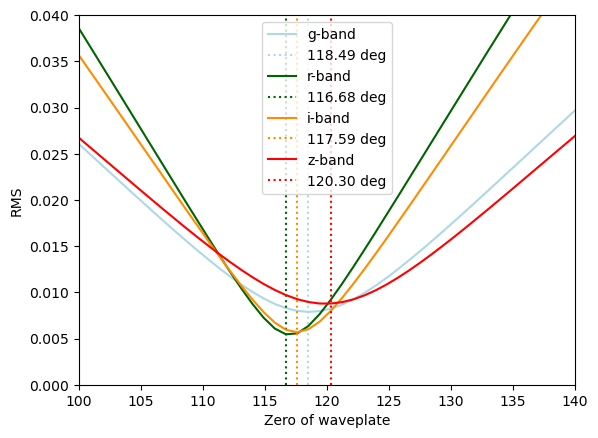

In [20]:
min_zeros = np.array([])
for ch in range(1,5) :        
    imin[ch-1] = np.argmin(rms[ch-1][mask])
    
    min_zero = zeros[mask][imin[ch-1]]
    min_zeros = np.append(min_zeros,min_zero)
    
    plt.plot(zeros,rms[ch-1],color=colors[ch-1],label="{}-band".format(bands[ch-1]))
    plt.vlines(min_zero, 0, np.max(rms[ch-1]), ls=":", color=colors[ch-1], label="{:.2f} deg".format(min_zero))
    
plt.xlim(100,140)
plt.ylim(0,0.04)
plt.xlabel("Zero of waveplate")
plt.ylabel("RMS")
plt.legend()
plt.show()     

### Calculate mean value and uncertainty  :

In [21]:
final_zero = ufloat(np.mean(min_zeros), np.std(min_zeros))
print("{} deg".format(final_zero))

118.3+/-1.3 deg
